# SVM(Support Vector Machines)

- 기계학습위 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도학습 모델
- 주로 분류와 회귀 분석을 위해 사용됨
- 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때 새로운 데이터가 어느 카테고리에 속할지 판단하는 기준으로 가장 큰 폭을 가진 경계를 찾는 알고리즘

## SVM의 장점
- 선형 분류 뿐 아니라 비선형 분류도 가능
- 모델을 만들 때 고려해야 할 파라미터가 많지 않음
- 적은 양의 데이터로도 모델을 만들 수 있음
- 딥러닝 이전에는 분류 모형 중에서 기술적으로 가장 진보된 모형으로 평가되었음

## SVM의 적용 분야
- 문서분류
- 안면인식
- 주가예측
- 부도예측
- 고객구매예측
- 채권등급평가예측

In [1]:
# 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류
from sklearn import svm, metrics
import random, re
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
import mglearn
from matplotlib import rc

# 한글 처리를 위해 폰트 설정
rc('font', family='AppleGothic')
# 음수 부호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 붗꽃 데이터 로딩
iris = datasets.load_iris()
# 2, 3열만 선택(3,4번째 필드)
X = iris.data[:, [2,3]]
y = iris.target

In [3]:
# 데이터셋 분리(7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

# 데이터를 학습시키고 예측하기
model = svm.SVC()
model.fit(X_train, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(model.score(X_test, y_test)))

학습용 데이터셋 정확도: 0.971
검증용 데이터셋 정확도: 0.978


/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [4]:
import random
# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

# 출력 파일 준비하기
fp = open("./data/bmi.csv", "w", encoding="utf-8")
# 쉼표(,)기준으로 띄어쓰지 말것!
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin": 0, "normal": 0, "fat": 0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()
print("데이터가 생성되었습니다,", cnt)

데이터가 생성되었습니다, {'thin': 6395, 'normal': 5884, 'fat': 7721}


In [5]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 로딩
tbl = pd.read_csv("./data/bmi.csv")

print(tbl.head())
print(type(tbl))
print(tbl.columns)

# 칼럼(열)을 자르고 정규화
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정

# 정규화시킨 데이터(0~1 사이의 값)
wh = pd.concat([w, h], axis=1)
print(wh.head())

# 학습용 데이터셋과 검증용 데이터셋으로 분리
data_train, data_test, label_train, label_test = train_test_split(wh, label)

# 데이터 학습
clf = svm.SVC()
clf.fit(data_train, label_train)

# 데이터 예측
predict = clf.predict(data_test)

# 결과 출력
print("학습용 데이터셋 정확도: {:.3f}".format(clf.score(data_train, label_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(clf.score(data_test, label_test)))

cl_report = metrics.classification_report(label_test, predict)
print("리포트 :\n", cl_report)

   height  weight   label
0     150      43  normal
1     148      72     fat
2     189      73  normal
3     181      46    thin
4     156      68     fat
<class 'pandas.core.frame.DataFrame'>
Index(['height', 'weight', 'label'], dtype='object')
   weight  height
0    0.43   0.750
1    0.72   0.740
2    0.73   0.945
3    0.46   0.905
4    0.68   0.780


/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


학습용 데이터셋 정확도: 0.989
검증용 데이터셋 정확도: 0.989
리포트 :
               precision    recall  f1-score   support

         fat       0.99      1.00      1.00      1927
      normal       0.98      0.98      0.98      1487
        thin       0.99      0.98      0.99      1586

   micro avg       0.99      0.99      0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



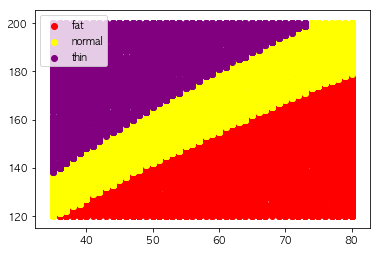

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Pandas로 CSV 파일 로딩
tbl = pd.read_csv("./data/bmi.csv", index_col=2)

# 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯에 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"], b["height"], c=color, label=lbl)
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend(loc=2)
plt.savefig("./data/bmi-result.png")

In [7]:
from sklearn.datasets import load_breast_cancer
# 데이터셋 로딩
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
# 569개의 데이터, 특성 30개
print("cancer 데이터의 형태: {}".format(cancer.data.shape))

cancer 데이터의 형태: (569, 30)


In [9]:
# 악성 212개, 양성 357개
print("클래스별 샘플 갯수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [10]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
from sklearn.svm import SVC

# 학습용 : 검증용 = 75:25
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# svm 모델 생성
svc = SVC()

# 학습용 데이터로 학습
svc.fit(X_train, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(svc.score(X_test, y_test)))

학습용 데이터셋 정확도: 1.000
검증용 데이터셋 정확도: 0.629


/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성 크기')

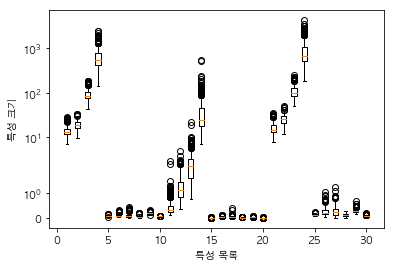

In [12]:
# 상자수염그림(데이터의 분포를 확인하는데 편리함)
plt.boxplot(X_train, manage_xticks=False)
# y축의 스케일 지정
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [13]:
# 데이터셋을 판다스의 데이터프레임으로 변환
df = pd.DataFrame(cancer.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.columns = cancer.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df['result'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [16]:
# 데이터 전처리, 0~1 사이로 맞추는 작업
# 학습용 데이터셋에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별(최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 학습용 데이터셋에서 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1로 조정됨
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최댓값\n{}".format(X_train_scaled.max(axis=0)))

특성별 최솟값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [17]:
# 검증용 데이터셋에도 같은 작업을 적용
# 학습용 데이터셋에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

In [18]:
df2 = pd.DataFrame(X_train_scaled, y_train)
print(df2.head())

         0         1         2         3         4         5         6   \
1  0.230442  0.321577  0.219404  0.122672  0.337678  0.126841  0.062980   
1  0.200625  0.421162  0.194527  0.103415  0.573151  0.165776  0.011729   
0  0.622320  0.769295  0.604036  0.474019  0.490605  0.287720  0.337395   
1  0.312793  0.337344  0.293345  0.181888  0.291626  0.072392  0.046790   
0  0.459511  0.435270  0.437496  0.302906  0.242641  0.177180  0.085497   

         7         8         9     ...           20        21        22  \
1  0.113320  0.411616  0.151432    ...     0.182497  0.365938  0.169032   
1  0.037689  0.444444  0.217355    ...     0.144077  0.366738  0.131979   
0  0.486630  0.349495  0.113100    ...     0.560655  0.699094  0.520892   
1  0.061531  0.259091  0.110362    ...     0.269299  0.375267  0.241546   
0  0.114662  0.396970  0.069292    ...     0.400213  0.387527  0.382937   

         23        24        25        26        27        28        29  
1  0.081744  0.434062  0

In [19]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

학습용 데이터셋 정확도: 0.948
검증용 데이터셋 정확도: 0.951


/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
# 감마, c값을 증가시켜 더 복잡한 모델 만들기
# svc = SVC(C=1)
# svc = SVC(C=100)
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

학습용 데이터셋 정확도: 0.988
검증용 데이터셋 정확도: 0.972


/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
